# Decorators

Sometimes you want to add or delete function from your code, you can either add to old function or create new function and add both old and new parts.So to switch on or off we use decorator.

Decorators can be thought of as functions which modify the *functionality* of another function. They help to make your code shorter and more "Pythonic". 

To properly explain decorators we will slowly build up from functions. Make sure to run every cell in this Notebook for this lecture to look the same on your own computer.<br><br>So let's break down the steps:

## Functions Review

In [1]:
def func():
    return 1

In [2]:
func()

1

# some important thing to notice.

In [10]:
def hello():
    print('brilliant')

In [11]:
hello()

brilliant


In [12]:
hello

<function __main__.hello()>

In [13]:
greet = hello

In [14]:
greet()

brilliant


In [15]:
del hello

In [16]:
hello

NameError: name 'hello' is not defined

In [17]:
greet()

brilliant


So in above code we can see that we created hello() which prints brilliant. we set it equal to greet. 
Then we deleted the hello() function and checked did hello still prints brilliant. It showed error that name 'hello' is not defined. 

Main thing to see was that whether greet() still possessed the values of hello even after hello is deleted. And when we printed greet() function we saw that still brilliant got printed. It means that hello transferred a copy to greet when they were set equal to each other.

So we can conclude that `functions(hello) are objects that can be passed into objects(greet).`

In [ ]:
#note: you can not set
# greet() = hello()      This means two function calls are set equal to each other which will give error.

#this is correct : greet =hello      #this is how two functions are set equal to each other

## Scope Review
Remember from the nested statements lecture that Python uses Scope to know what a label is referring to. For example:

In [ ]:
s = 'Global Variable'

def check_for_locals():
    print(locals())

Remember that Python functions create a new scope, meaning the function has its own namespace to find variable names when they are mentioned within the function. We can check for local variables and global variables with the <code>locals()</code> and <code>globals()</code> functions. For example:

In [ ]:
print(globals())

Here we get back a dictionary of all the global variables, many of them are predefined in Python. So let's go ahead and look at the keys:

In [ ]:
print(globals().keys())

Note how **s** is there, the Global Variable we defined as a string:

In [ ]:
globals()['s']

Now let's run our function to check for local variables that might exist inside our function (there shouldn't be any)

In [ ]:
check_for_locals()

Great! Now lets continue with building out the logic of what a decorator is. Remember that in Python **everything is an object**. That means functions are objects which can be assigned labels and passed into other functions. Lets start with some simple examples:

In [3]:
def hello(name='Jose'):
    return 'Hello '+name

In [4]:
hello()

'Hello Jose'

Assign another label to the function. Note that we are not using parentheses here because we are not calling the function **hello**, instead we are just passing a function object to the **greet** variable.

In [5]:
greet = hello

In [6]:
greet

<function __main__.hello>

In [7]:
greet()

'Hello Jose'

So what happens when we delete the name **hello**?

In [8]:
del hello

In [9]:
hello()

NameError: name 'hello' is not defined

In [10]:
greet()

'Hello Jose'

Even though we deleted the name **hello**, the name **greet** *still points to* our original function object. It is important to know that functions are objects that can be passed to other objects!

## Functions within functions
Great! So we've seen how we can treat functions as objects, now let's see how we can define functions inside of other functions:

In [11]:
def hello(name='Jose'):
    print('The hello() function has been executed')
    
    def greet():
        return '\t This is inside the greet() function'
    
    def welcome():
        return "\t This is inside the welcome() function"
    
    print(greet())        #here greet is outside greet function i.e. aligned with hello. Keep indentation in mind.
    print(welcome())
    print("Now we are back inside the hello() function")

In [12]:
hello()

The hello() function has been executed
	 This is inside the greet() function
	 This is inside the welcome() function
Now we are back inside the hello() function


In [13]:
welcome()

NameError: name 'welcome' is not defined

Since welcome was present inside hello() function therfore welcome() function got printed when hello() was called.

When welcome() was called we got error because it is present inside hello() and you can not call it from outside.


But what if we want to access welcome() functions outside hello() function. Then in that case we want that `hello() 
function should return welcome function` and not print welcome function.

This means here also: 
welcome = hello , then only welcome is returned. (just like above example where greet = hello)

Note how due to scope, the welcome() function is not defined outside of the hello() function. Now lets learn about returning functions from within functions:
## Returning Functions

In [19]:
def hello(name='Jose'):
    
    def greet():                        #so first we define functions inside function.
        return '\t This is inside the greet() function'
    
    def welcome():
        return "\t This is inside the welcome() function"
    
    if name == 'Jose':   #so if name equal jose then grret function is returned else welcome function is returned.
        return greet
    else:
        return welcome

Now let's see what function is returned if we set x = hello(), note how the empty parentheses means that name has been defined as Jose.

In [20]:
takefunction = hello() #since default value was jose. So greet function was send and got stored in takefunction.

In [21]:
takefunction

<function __main__.hello.<locals>.greet()>

Great! Now we can see how x is pointing to the greet function inside of the hello function.

In [24]:
print(takefunction())  #so takefunction() is called and it threw out the contents of greet function. 
                     #It means function(greet) is returned by another function(hello) and passed to takefunction

	 This is inside the greet() function


Let's take a quick look at the code again. 

In the <code>if</code>/<code>else</code> clause we are returning <code>greet</code> and <code>welcome</code>, not <code>greet()</code> and <code>welcome()</code>. 

This is because when you put a pair of parentheses after it, the function gets executed; whereas if you don’t put parentheses after it, then it can be passed around and can be assigned to other variables without executing it.

When we write <code>x = hello()</code>, hello() gets executed and because the name is Jose by default, the function <code>greet</code> is returned. If we change the statement to <code>x = hello(name = "Sam")</code> then the <code>welcome</code> function will be returned. We can also do <code>print(hello()())</code> which outputs *This is inside the greet() function*.

## Functions as Arguments
Now let's see how we can pass functions as arguments into other functions:

In [18]:
def hello():
    return 'Hi Jose!'

def other(func):
    print('Other code would go here')
    print(func())

In [26]:
hello      #here hello is our raw function and this is how it should be send as argument.

<function __main__.hello(name='Jose')>

In [ ]:
hello()        #this is the executable form of hello() function.

In [19]:
other(hello)   #here hello() function is passed as an argument inside other() function

Other code would go here
Hi Jose!


Great! Note how we can pass the functions as objects and then use them within other functions. Now we can get started with writing our first decorator:

## Creating a Decorator
In the previous example we actually manually created a Decorator. Here we will modify it to make its use case clear:

In [28]:
def new_decorator(original_func):

    def wrap_func():
        print("Code would be here, before executing the func")

        original_func()

        print("Code here will execute after the func()")

    return wrap_func

def func_needs_decorator():
    print("This function is in need of a Decorator")


In [29]:
func_needs_decorator()

This function is in need of a Decorator


In [30]:
# Reassign func_needs_decorator
func_needs_decorator = new_decorator(func_needs_decorator)

In [31]:
func_needs_decorator()

Code would be here, before executing the func
This function is in need of a Decorator
Code here will execute after the func()


#    Explaination:
    
1.so here we want to decorate wrap_func with an outside function which is func_needs_decorator().(or voce versa) 

2.so func_needs_decorator() is send as argument to new_decorator() and then it is copied to original function.

3.This original function is placed inside wrap function which brings changes inside wrap function.

4.And once wrap functon witness change, then entire changed wrap_function is returned to new_decorator function.

5.new_decorator sends it back to func_need_decorator function and then 

6.func_need_decorator function is printed with all contents of wrap_function + changes in them.

# Hence we receive wrap_function decorated with func_needs_decorator.
# or we can say that func_needs_decorator got decorated with wrap_function.

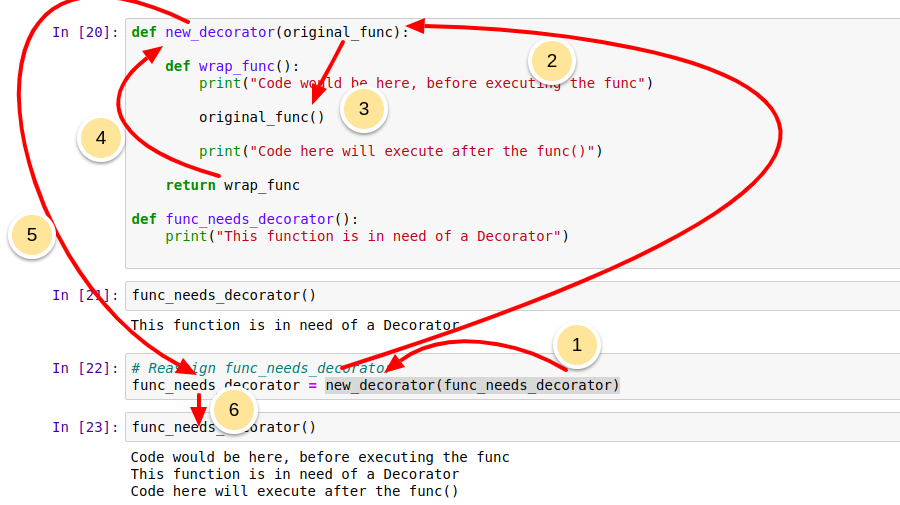

So what just happened here? A decorator simply wrapped the function and modified its behavior. Now let's understand how we can rewrite this code using the @ symbol, which is what Python uses for Decorators:

In [39]:
@new_decorator     #so @new_decorator performs step 2 to step 5.@new_decorator is nothing but 
                    #replacement of func_needs_decorator = new_decorator(func_needs_decorator)
def func_needs_decorator():
    print("This function is in need of a Decorator")

In [40]:
func_needs_decorator()    #then it is printed.

Code would be here, before executing the func
This function is in need of a Decorator
Code here will execute after the func()


# Now if you don't want to decorate you can switch off the @new_decorator

In [41]:
#@new_decorator     #so @new_decorator is switched off.
def func_needs_decorator():
    print("This function is in need of a Decorator")

In [42]:
func_needs_decorator()    #only one line is printed,

This function is in need of a Decorator


**Great! You've now built a Decorator manually and then saw how we can use the @ symbol in Python to automate this and clean our code. You'll run into Decorators a lot if you begin using Python for Web Development, such as Flask or Django!**

In [ ]:
l